In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# sns.set()

In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', '0.jpg', '0.png', '1.jfif', '1.jpg', '2.jpg', '23.jpg', '3.jpg', '4.jpg', '5.jfif', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '8s.jpg', '9.jfif', '9.jpg', '9.png', 'accu_80p.model', 'accu_90p.model', 'convt.py', 'DigitRecog.py', 'H6.png', 'H765.jpg', 'handwritten5.jpg', 'manan.ipynb', 'nos.jpg', 'Ph.jpg', 'test.csv', 'train.csv', 'try.py', 'updated.jpg', 'updated.png']


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values

In [5]:
print(pd.DataFrame(X_train).isna().sum())
print(test_data.isna().sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
754    0
755    0
756    0
757    0
758    0
759    0
760    0
761    0
762    0
763    0
764    0
765    0
766    0
767    0
768    0
769    0
770    0
771    0
772    0
773    0
774    0
775    0
776    0
777    0
778    0
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
     

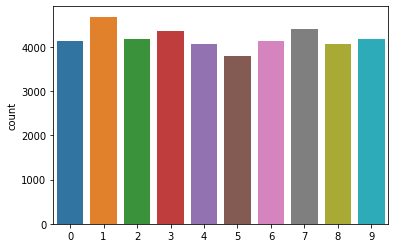

In [6]:
sns.countplot(y_train)

In [7]:
X_train = X_train/255.0
test_data = test_data/255.0

In [8]:
X_train = X_train.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [ ]:
# for i in X_train:
#     cv2.imshow('img', i)
#     if cv2.waitKey(250):
#         cv2.destroyAllWindows()

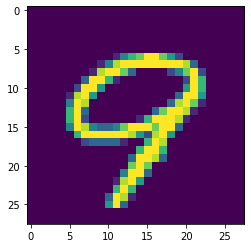

In [9]:
plt.imshow(X_train[11045].reshape(28, 28))
plt.show()

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)   

Using TensorFlow backend.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

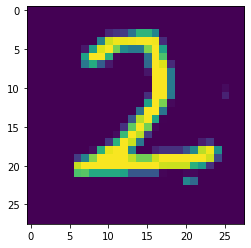

In [12]:
plt.imshow(X_train[108].reshape(28, 28))
plt.show()

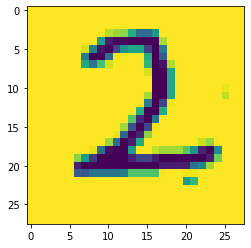

In [13]:
plt.imshow(1-X_train[108].reshape(28, 28))
plt.show()

In [14]:
X_train2 = 1 - X_train
X_test2 = 1 - X_test

In [15]:
X_train = np.concatenate((X_train,X_train2),axis = 0)
y_train = np.concatenate((y_train,y_train),axis=0)
X_test = np.concatenate((X_test,X_test2),axis = 0)
y_test =  np.concatenate((y_test,y_test),axis = 0)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
# import numpy as np

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [18]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3),input_shape = (28,28,1),activation = 'relu',padding='same'))

classifier.add(MaxPool2D((2,2)))


classifier.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding='same'))

classifier.add(MaxPool2D(2,2))

classifier.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding='same'))

classifier.add(MaxPool2D(2,2))

classifier.add(Flatten())

classifier.add(Dense(units = 64,activation='relu'))
classifier.add(Dense(units = 10,activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

W1121 13:29:48.703521 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1121 13:29:49.052638 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 13:29:49.239130 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 13:29:49.322905 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1121 13:29:49.492453 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda

In [ ]:
# classifier = keras_model1(28, 28, 10)

In [19]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [20]:
classifier.fit(X_train,y_train,batch_size = 100,epochs=10,validation_data=(X_test,y_test)) 

W1121 13:30:00.992517 15292 deprecation.py:323] From C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1121 13:30:01.176031 15292 deprecation_wrapper.py:119] From C:\Users\Acer\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 63000 samples, validate on 21000 samples
Epoch 1/10
63000/63000 [==============================] - 76s 1ms/step - loss: 0.2914 - acc: 0.9084 - val_loss: 0.0780 - val_acc: 0.9751
Epoch 2/10
63000/63000 [==============================] - 75s 1ms/step - loss: 0.0672 - acc: 0.9787 - val_loss: 0.0564 - val_acc: 0.9823
Epoch 3/10
63000/63000 [==============================] - 76s 1ms/step - loss: 0.0467 - acc: 0.9851 - val_loss: 0.0543 - val_acc: 0.9826
Epoch 4/10
63000/63000 [==============================] - 75s 1ms/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0620 - val_acc: 0.9812
Epoch 5/10
63000/63000 [==============================] - 75s 1ms/step - loss: 0.0304 - acc: 0.9903 - val_loss: 0.0388 - val_acc: 0.9882
Epoch 6/10
63000/63000 [==============================] - 75s 1ms/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0438 - val_acc: 0.9864
Epoch 7/10
63000/63000 [==============================] - 75s 1ms/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0470 - val_acc

In [ ]:
# def train_speedometer(x_train, y_train):
# #     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
#     all=[]
#     for i in range(1, 10):
#         model = KNeighborsRegressor(n_neighbors=i)
#         print(model.fit(x_train, y_train))
#         print('train_scr: ',model.score(x_train, y_train))
#         scr=model.score(x_test, y_test)
#         print('test_scr: ', scr)
#         all.append(model)
#     return max(all)

In [21]:
X_train.shape

(63000, 28, 28, 1)

In [22]:
#classifier = train_speedometer(X_train.reshape(-1, 784), y_train)

NameError: name 'train_speedometer' is not defined

In [23]:
result = classifier.predict(test_data)

In [25]:
results = np.argmax(result,axis = 1)
print(results)

[2 0 9 ... 3 9 2]


In [26]:
from PIL import Image
im = Image.open('handwritten5.jpg')
im = im.resize((28,28))
im.save('updated.png')

In [27]:
im = cv2.imread('updated.png', 0)/255.0
im2 = np.round(im, 0)
# for i in range(28):
#     for j in range(28):
#         im[i][j] = round(im[i][j],0) # only binary value why?
# cv2.imshow('image',im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# im2

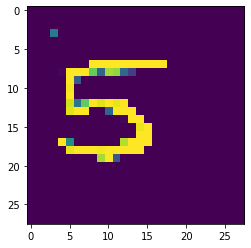

In [28]:
plt.imshow(1-im)
plt.show()

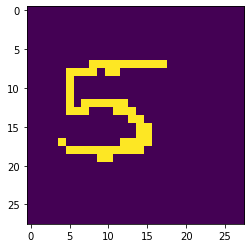

In [29]:
plt.imshow(1-im2)
plt.show()

In [30]:
OP = classifier.predict(1-im2.reshape(1, 28, 28, 1))
op = np.argmax(OP,axis = 1)
print(OP, op)

[[3.8681460e-08 4.3014210e-09 4.9766248e-07 1.9009866e-02 2.1495421e-06
  8.9511627e-01 1.4119759e-05 3.1535054e-04 7.8701746e-04 8.4754691e-02]] [5]


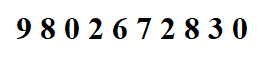

In [72]:
im = Image.open('ph.jpg')
im

In [73]:
np.array(im).shape

(62, 262, 4)

In [74]:
im = im.resize((560,56))
im.save('updated.png')

In [75]:
im = cv2.imread('updated.png',0)/255.0
# im = Image.open('updated.png')
# im

In [76]:
im.shape

(56, 560)

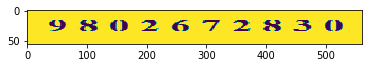

In [77]:
plt.imshow(im)
plt.show()

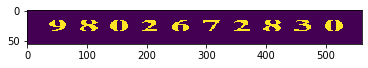

In [78]:
im2 = np.round(im, 0)
plt.imshow(1-im2)
plt.show()

In [79]:
list_im = []
imlist = []

In [80]:
for j in range(560):
    if np.all(im[:,j] == 1):
        list_im.append(j)

if 0 in list_im:  
    list_im.remove(0)  
    list_im.insert(0,1)
    
if 559 in list_im:
    list_im.remove(559)     

k=140
while k:
    for j in list_im:
        if np.all(im[:,j-1] == 1) and np.all(im[:,j+1]==1):
            list_im.remove(j)
    k=k-1

imlist = [0,]


for i in range(len(list_im)):
    if i==19:
        break

    if i%2 != 0:
        imlist.append(int((list_im[i] + list_im[i+1])/2))

list_im = []
imlist.append(559)

In [81]:
for j in range(len(imlist)):
    if j==10:
        break        
    img = im[:,imlist[j]:imlist[j+1]]
    list_im.append(img)

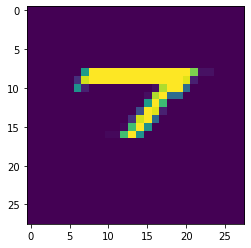

In [82]:
t=Image.fromarray(list_im[5]).resize((28, 28))
t=np.array(t)
plt.imshow(1-t)
plt.show()

In [83]:
x=np.zeros( (len(list_im), 28, 28, 1) )

In [84]:
PhoneNo = []
for i in range(len(list_im)):              
    img = Image.fromarray(list_im[i])   
    img = img.resize((28,28))
    img = np.array(img)
    img = img.reshape(1, 28,28,1)
    x[i, :, :] = 1-img
OP = classifier.predict(x)  
op = np.argmax(OP,axis = 1)    
# PhoneNo=op

In [85]:
OP[5]

array([4.2218827e-13, 1.3008132e-07, 1.6822845e-05, 9.0080523e-01,
       3.1098947e-16, 7.7154240e-08, 2.3822245e-13, 9.9168129e-02,
       9.6043823e-06, 3.3814050e-08], dtype=float32)

In [86]:
op

array([8, 7, 9, 3, 5, 3, 3, 7, 3, 9], dtype=int64)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib 

In [64]:
# joblib.dump(classifier, )

In [65]:
classifier = joblib.load('accu_90p.model')

In [66]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(classifier.predict(X_test), axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66      2060
           1       0.96      0.69      0.80      2448
           2       0.28      0.85      0.43      2062
           3       0.34      0.72      0.46      2152
           4       1.00      0.49      0.66      2106
           5       0.75      0.87      0.80      1868
           6       0.97      0.50      0.66      2058
           7       0.99      0.49      0.66      2178
           8       0.99      0.49      0.66      1978
           9       0.96      0.49      0.65      2090

    accuracy                           0.61     21000
   macro avg       0.82      0.61      0.64     21000
weighted avg       0.82      0.61      0.64     21000



In [67]:
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(classifier.predict(X_test), axis=1)))

[[1047    4  191  757    0   44   11    0    0    6]
 [   1 1678  752   12    0    0    0    3    2    0]
 [  12    2 1749  237    0   48    0    0    0   14]
 [   1    0  397 1543    0  209    0    0    2    0]
 [   1    9  551  487 1030   12    5    0    0   11]
 [   0    2   78  148    0 1631    8    0    1    0]
 [  17   13   48  875    0   77 1028    0    0    0]
 [   2    4 1079   12    0    4    0 1076    0    1]
 [  29   27  563  294    1   79    3    0  973    9]
 [  15    2  751  194    4   82    0    8    1 1033]]


In [68]:
ones_filter = np.where(np.argmax(y_test, axis=1)==1)[0]

In [69]:
ones_filter.shape

(2448,)

In [70]:
ones = X_test[ones_filter]

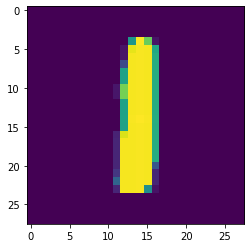

In [71]:
plt.imshow(ones[12].reshape(28, 28))
plt.show()